# Converting Grayscale to Black and White
Sometimes you need to represent color images as absolute black and white. Binary picture files requite much less storage space, as each pixel can be represented with a single bit.


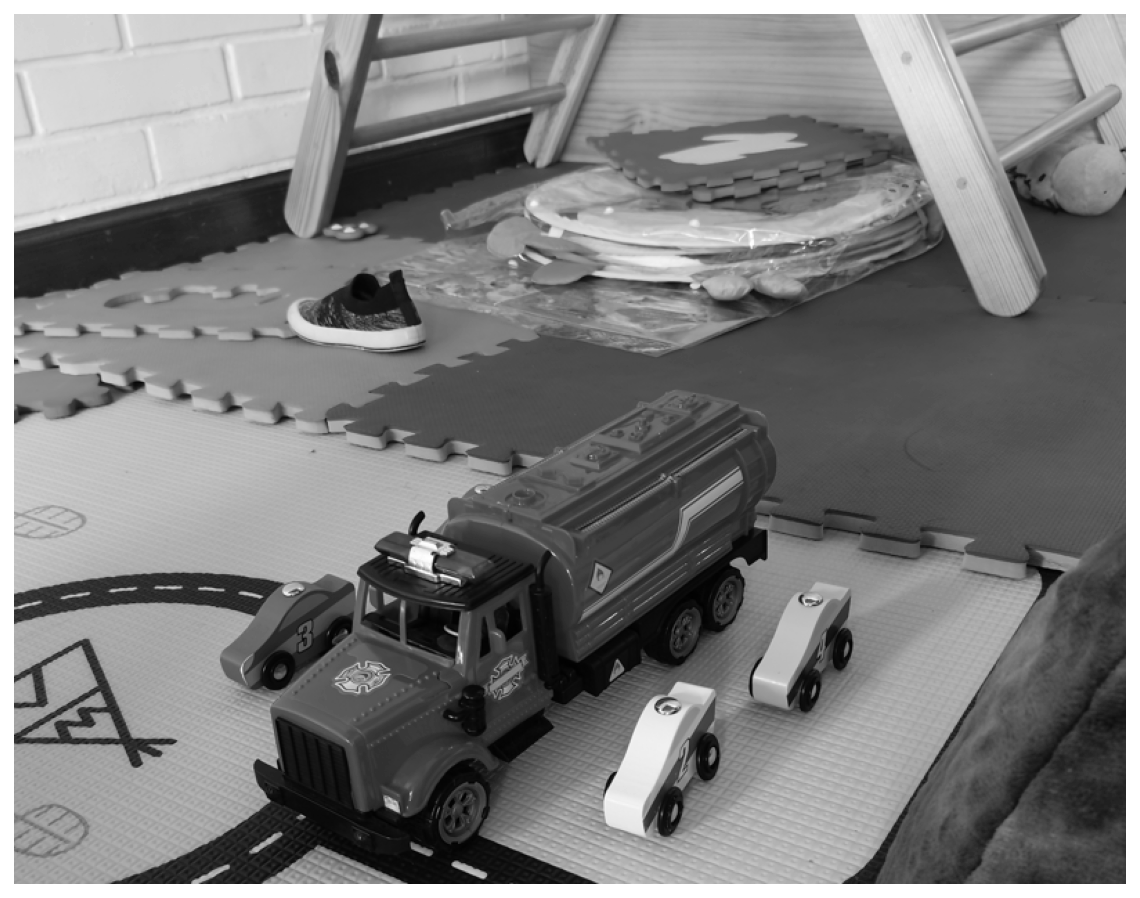

In [1]:
# Let's work with the play space picture

import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = 'retina'
from matplotlib import rcParams
from EC_CV import *

rcParams['figure.figsize'] = 20,8

toys = adapt_PNG(plt.imread('playspace.png'))
toys_wgt = np.dot(toys[...,:3], [0.299,0.587,0.114])
plt.axis("off")
plt.imshow(toys_wgt,cmap='gray')

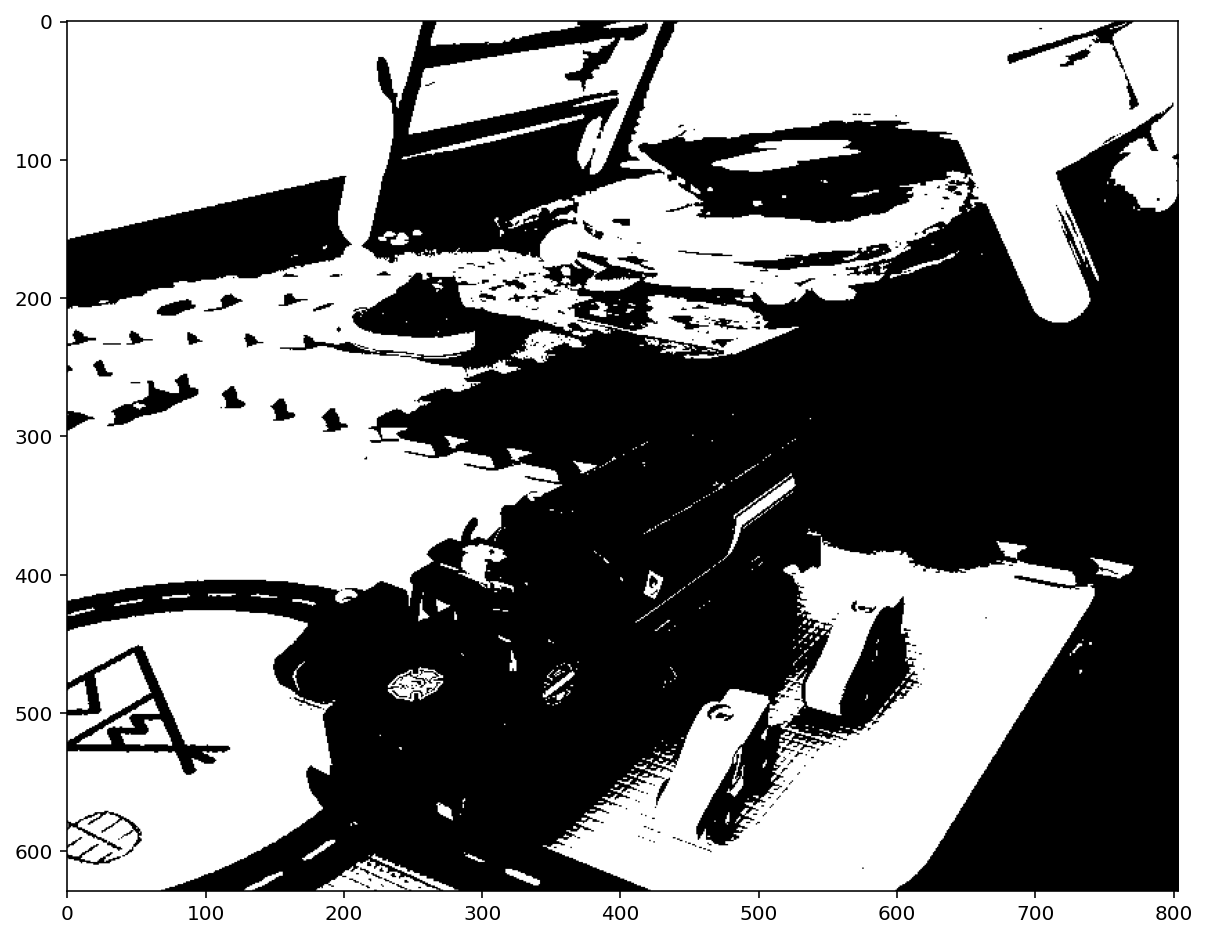

In [2]:
# Let's turn each pixel to total black or total white.
# We'll use the grayscale_to_BW() function from EC_CV

rcParams['figure.figsize'] = 20,8

toys_BW = grayscale_to_BW(toys_wgt,127)
plt.imshow(toys_BW, cmap = 'gray')

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x255b0f701c0>)

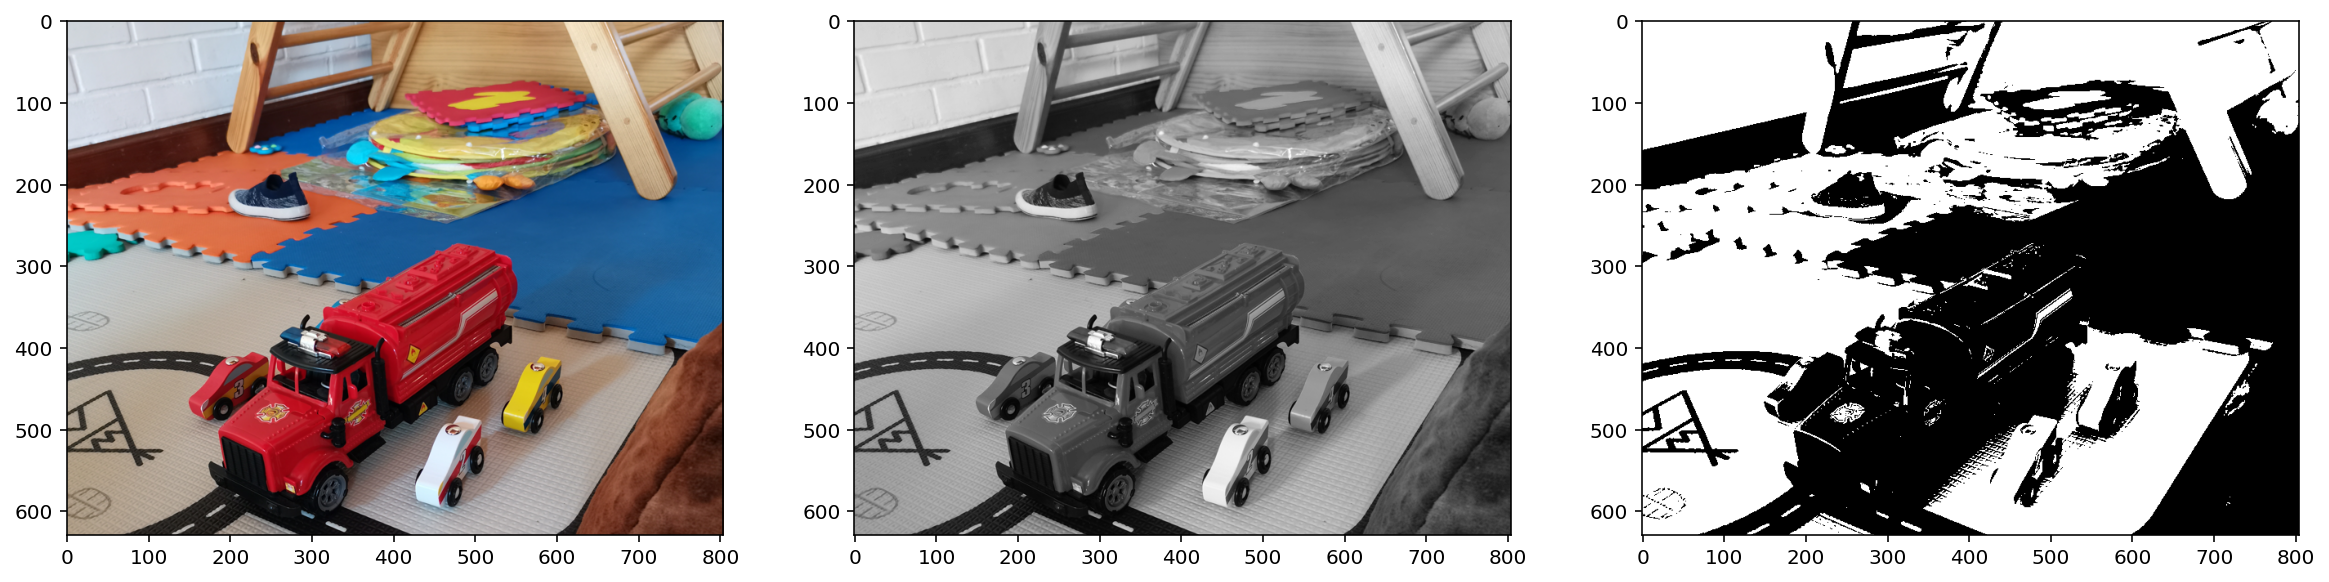

In [27]:
def png2jpeg(img):
    img = img[:,:,:3]
    img = img*255
    return np.uint8(np.clip(img.round(),0,255))
def gray2bw(img,tresh):
    rows,cols = img.shape
    bw = np.zeros((rows,cols))
    for i in range(rows):
        for j in range(cols):
            bw[i,j]=0 if img[i,j]<=tresh else 255
    return bw
def color2gray(img):
    rows,cols,temp = img.shape
    gs = np.zeros((rows,cols))
    for i in range(rows):
        for j in range(cols):
            gs[i,j]=np.average(img[i,j])
    return gs

toys = plt.imread('playspace.png')
plt.subplot(131),plt.imshow(toys)
toys = png2jpeg(toys)
toys_gray = color2gray(toys)
plt.subplot(132),plt.imshow(toys_gray,cmap='gray')
toys_BW =gray2bw(toys_gray,115)
plt.subplot(133),plt.imshow(toys_BW,cmap='gray')

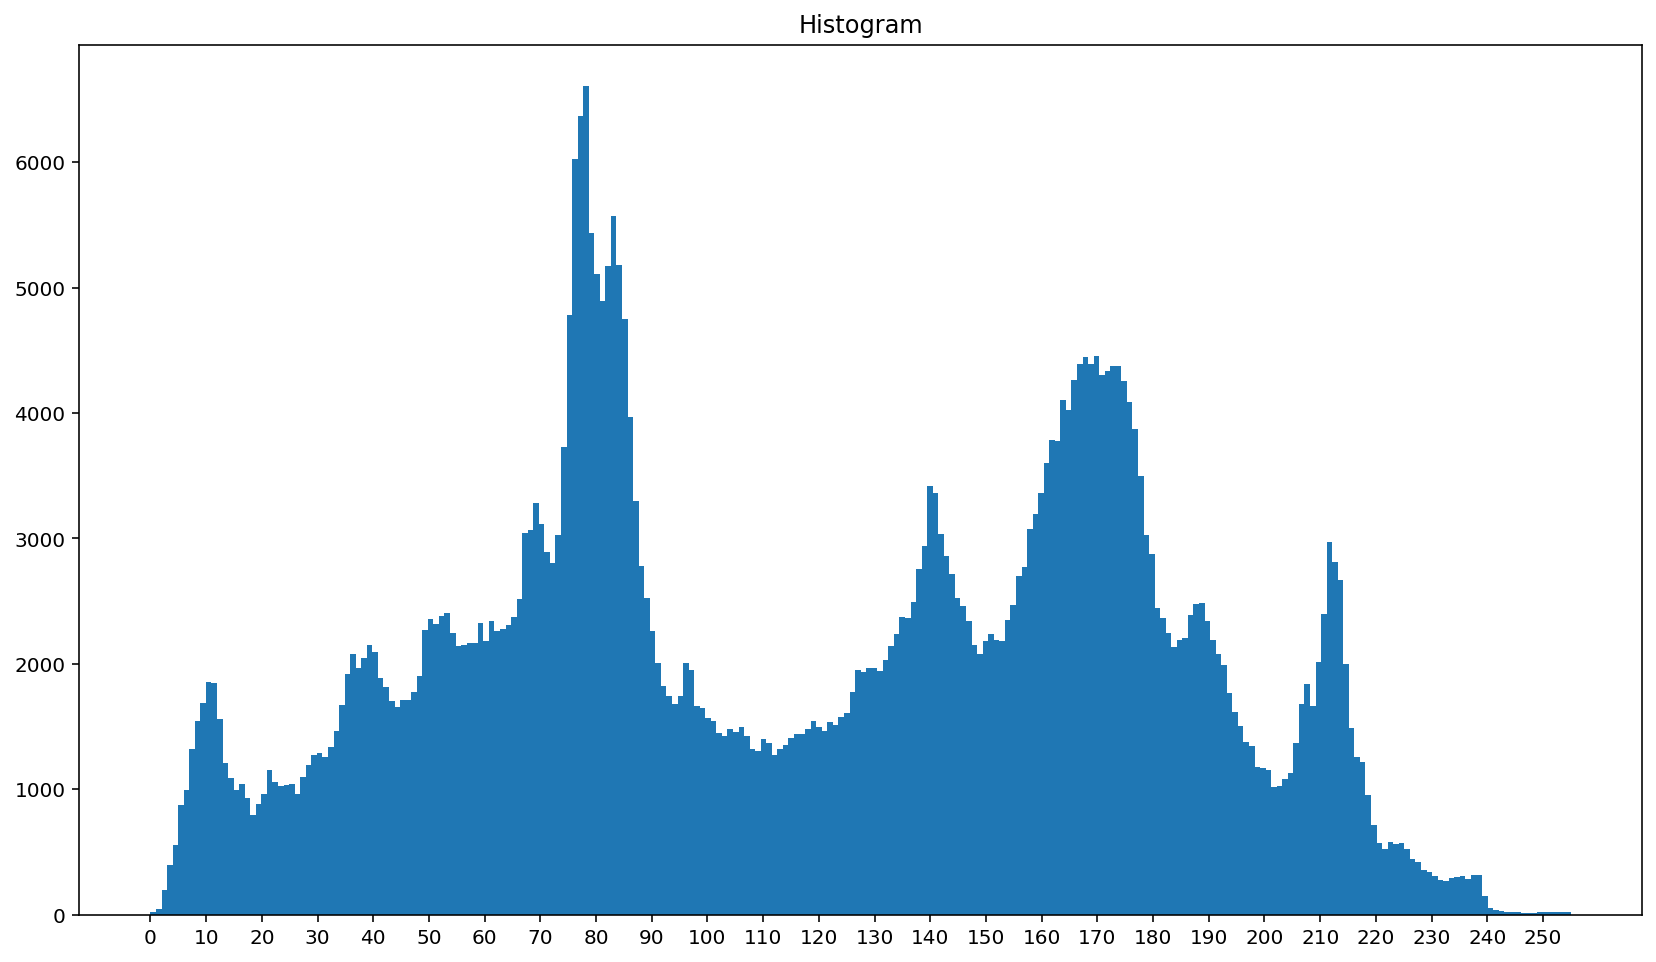

In [25]:
# Let's see a histogram of the grayscale image

rcParams['figure.figsize'] = (14,8)
plt.hist(toys_wgt.ravel(),256,[0,255])
plt.title('Histogram')
plt.xticks(np.arange(0, 255, 10))
plt.show()

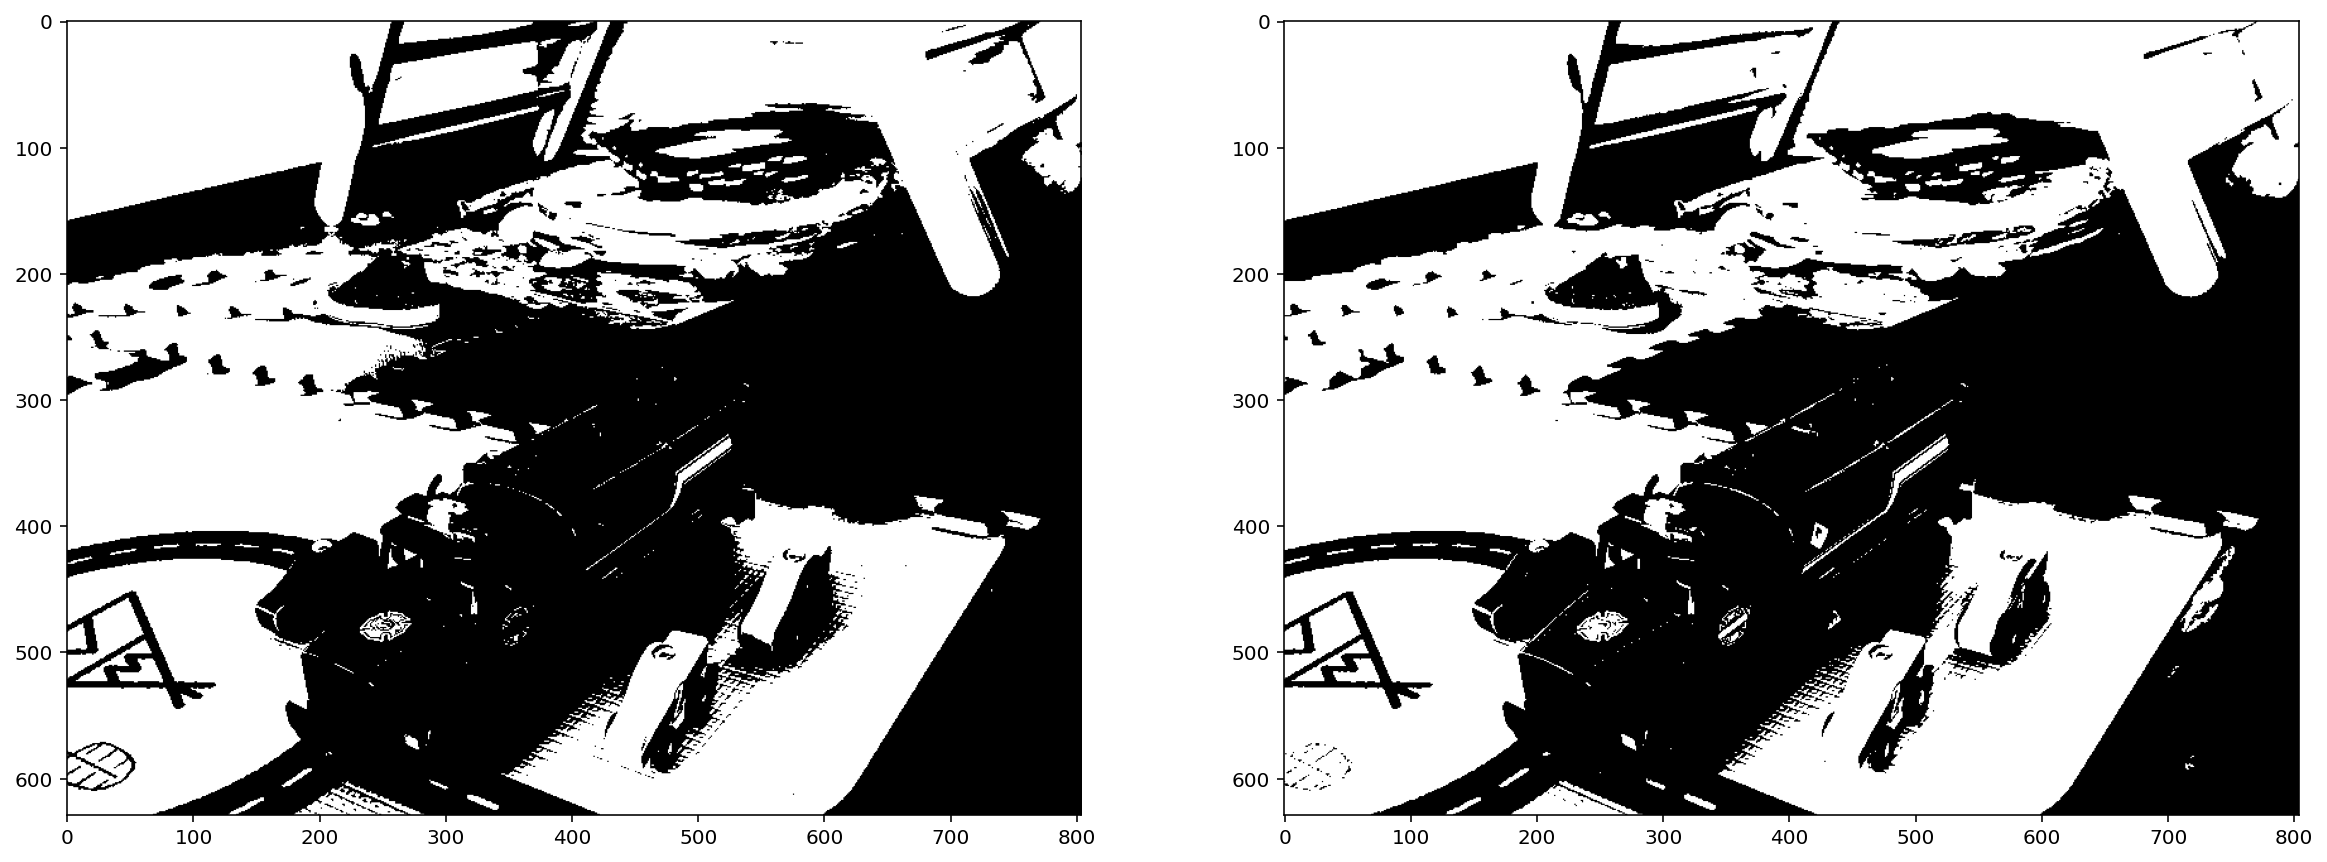

In [26]:
# Now let's create a new Black and White image with a threshold of 115
rcParams['figure.figsize'] = (20,8)

toys_BW2 = grayscale_to_BW(toys_wgt,115)

fig, ax = plt.subplots(1,2)
ax[0].imshow(toys_BW, cmap='gray')
ax[1].imshow(toys_BW2, cmap='gray')
